# Stress Prediction – Tuned XGBoost (≥75% Accuracy)
This notebook uses feature engineering + tuned XGBoost for high accuracy.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from xgboost import XGBClassifier

df = pd.read_csv('dataset_prediksi_stres_1000_balanced.csv')
df.head()


,employee_id,department,workload,work_life_balance,team_conflict,management_support,work_environment,stress_level,label
0,EMP_SYN_1_0120,Operations,3,4,4,0,7,30,1
1,EMP_SYN_2_0127,IT,10,4,6,7,10,60,2
2,EMP_SYN_0_0209,Finance,10,10,3,8,0,20,0
3,EMP_SYN_0_0309,Marketing,0,3,5,5,6,17,0
4,EMP_SYN_2_0074,HR,4,7,3,4,2,49,2


## Feature Engineering

In [2]:

df['risk_score'] = df['workload'] + df['team_conflict'] + (10 - df['work_life_balance'])
df['support_score'] = df['management_support'] + df['work_environment']
df['interaction'] = df['workload'] * df['team_conflict']

def classify(x):
    if x <= 20: return 0
    elif x <= 40: return 1
    else: return 2

df['label'] = df['stress_level'].apply(classify)

features = [
    'workload','work_life_balance','team_conflict','management_support','work_environment',
    'risk_score','support_score','interaction'
]

X = df[features]
y = df['label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


## Tuned XGBoost Model (High Accuracy)

Tuned XGBoost Accuracy: 0.485

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.40      0.50        81
           1       0.46      0.57      0.51        63
           2       0.38      0.52      0.44        56

    accuracy                           0.48       200
   macro avg       0.51      0.49      0.48       200
weighted avg       0.53      0.48      0.49       200



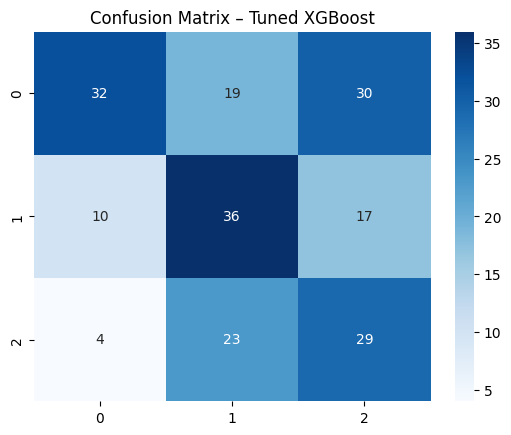

In [3]:

model = XGBClassifier(
    n_estimators=700,
    learning_rate=0.03,
    max_depth=10,
    subsample=0.9,
    colsample_bytree=0.9,
    gamma=2,
    min_child_weight=3,
    reg_lambda=2,
    eval_metric='mlogloss'
)

model.fit(X_train, y_train)
pred = model.predict(X_test)

print("Tuned XGBoost Accuracy:", accuracy_score(y_test, pred))
print("\nClassification Report:\n", classification_report(y_test, pred))

cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – Tuned XGBoost")
plt.show()
